# Double-descent phenomena on Random Forest
The double descent risk curve, a phenomenon where test error first gets better, then worse, and then gets better again,  is one of the most interesting phenomena in understanding and analyzing modern machine learning. 

We provide an example where ensembles of either shallow or deep trees can achieve Bayes optimal performance, but only the ensemble of deep trees exhibit the double descent phenomenon.  This is because when the trees are deep, more trees (parameters) are essentially only smoothing, whereas when the trees are shallow, more trees (parameters) are both smoothing and adding capacity. 

*Let's first import the necessary packages and modules*

In [1]:
import sys

sys.path.append("../")

from functions import run_df_experiment, read_df_results, plot_df_results

The experimental setup is as follows. We generate a two-dimensional Gaussian XOR dataset as a benchmark with four spherically symmetric Gaussians.  Class one has two Gaussians with centers (-1,-1) and (1,1), whereas the other class has two Gaussians with means (1,-1) and (-1,1). There will be 5096 random samples from the two classes, which will be split into 4096 training samples and 1000 testing samples.

*Run the two experiments: one with deep trees and the other with shallow trees.*

In [2]:
n_reps = 1  # the number of repetitions of a single run of the algorithm
# Run DeepRF
error_deep = run_df_experiment(max_node=None, n_est=10, n_reps=n_reps, exp_alias="deep")
# Run ShallowRF
error_shallow = run_df_experiment(max_node=15, n_est=100, n_reps=n_reps, exp_alias="shallow")
# np.save('errors.npy', [error_5, error_dd])

In [4]:
error_deep = read_df_results(n_reps, exp_alias="deep")
error_shallow = read_df_results(n_reps, exp_alias="shallow")

In [5]:
results = [error_deep, error_shallow]
titles = ["RF with overfitting trees", "RF with shallow trees"]

*Visualize the generalization error and gini impurity of both decision tree variants.*

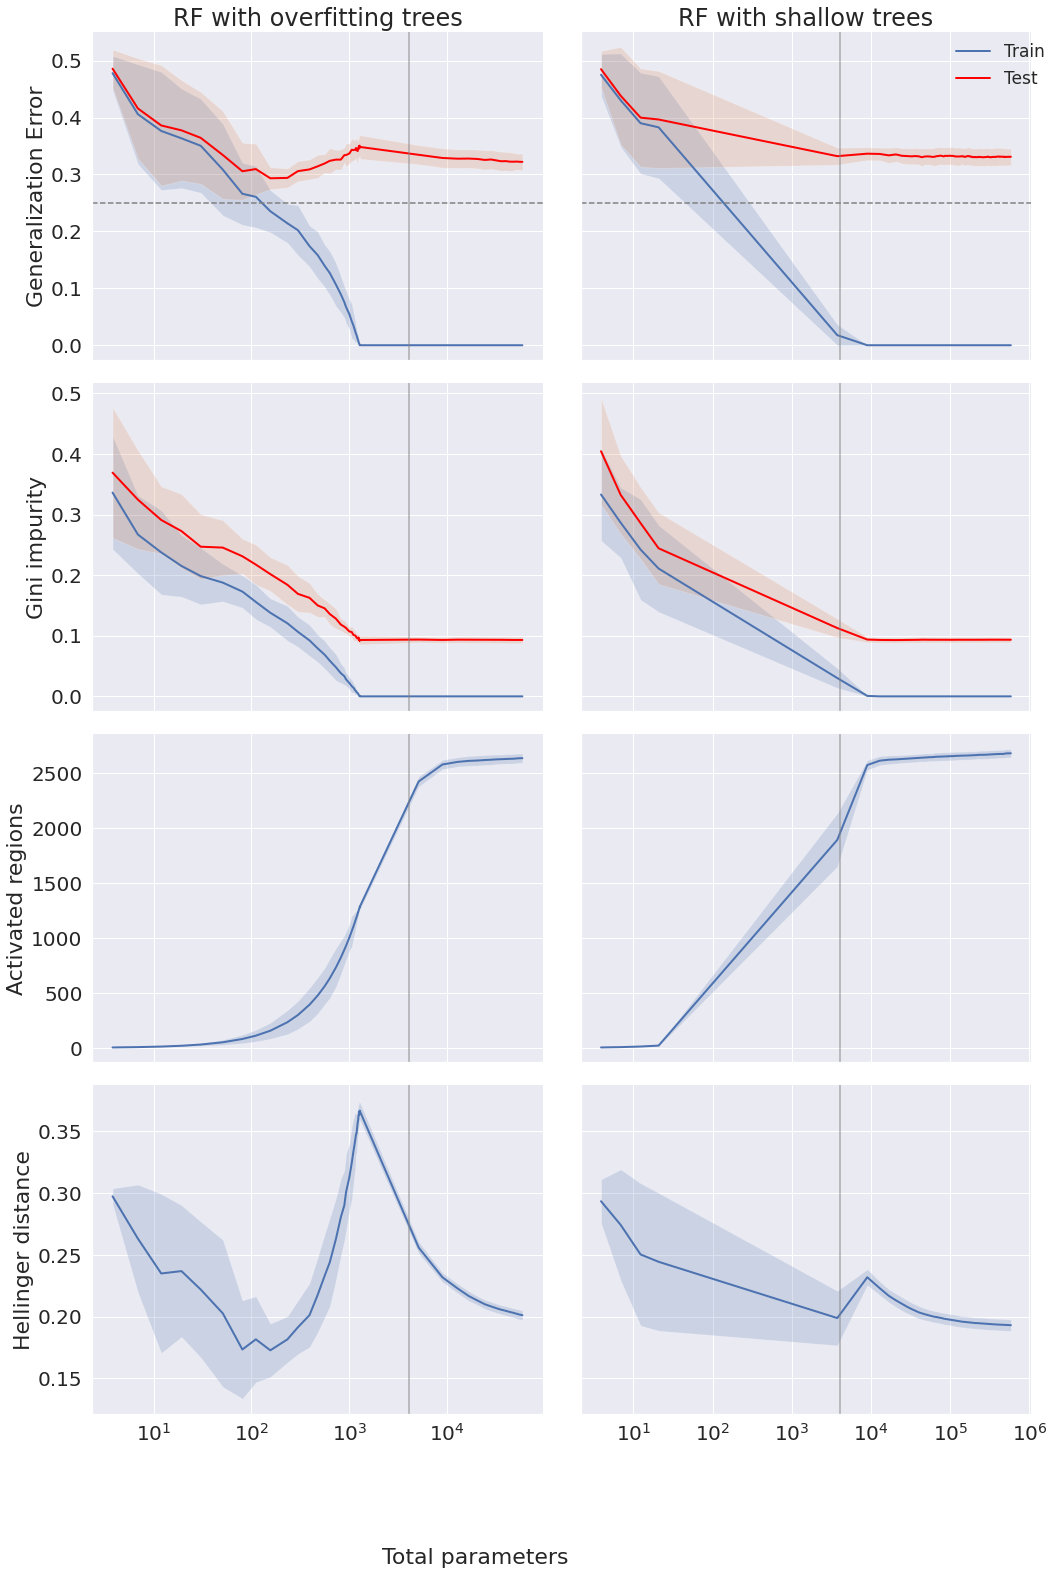

In [43]:
plot_df_results(results, titles)